In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout,Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers.experimental import preprocessing
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
import tensorflow.compat.v1 as tf
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
tf.disable_v2_behavior()

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
images=pd.read_csv('../input/alexu-word/alexuw/alexuw_sampleFileNames.txt', header= None)
images.rename(columns={0:'image'},inplace=True)
labels = pd.read_csv('../input/alexu-word/alexuw/alexuw_sampleWordLabels.txt', header= None)
labels.rename(columns={0:'label'},inplace=True)
labels.head()

,label
0,1
1,10
2,11
3,12
4,13


In [3]:
images.head()

,image
0,1-1.jpg
1,1-10.jpg
2,1-11.jpg
3,1-12.jpg
4,1-13.jpg


In [4]:
df  = pd.concat([images,labels], axis = 1)
df.info()
df.to_csv('df.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25114 entries, 0 to 25113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   25114 non-null  object
 1   label   25114 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 392.5+ KB


In [5]:

df.label=df.label.astype(str)
from keras_preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    validation_split=0.1,
    rescale=1.0/255.0,
    
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening randomly f
    rotation_range=15,  
    vertical_flip=False
)

training_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory="../input/alexu-word/alexuw/pooledImages",
    x_col="image",
    y_col="label",
    color_mode= "grayscale",
    target_size=(64,64),
    batch_size=32,
    subset="training"
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory= "../input/alexu-word/alexuw/pooledImages",
    x_col="image",
    y_col="label",
    color_mode= "grayscale",
    target_size=(64,64),
    batch_size=32,
    subset="validation"
)

classes = len(training_generator.class_indices)

Found 22603 validated image filenames belonging to 109 classes.
Found 2511 validated image filenames belonging to 109 classes.


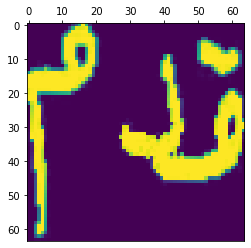

In [6]:
fig, ax = plt.subplots()
ax.xaxis.tick_top()
ax.imshow(training_generator[6][0][9])

In [7]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
)

# Reduce learning rate when validation loss plateaus
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5
)

In [8]:
train=True
num_classes = 109
weight_decay = 0.0005
x_shape = [64,64,1]

In [9]:
model = Sequential()
weight_decay = weight_decay

model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [10]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(training_generator, steps_per_epoch=len(training_generator), epochs=20,callbacks=[early_stopping, reduce_lr],validation_data=validation_generator)

2022-03-24 03:13:02.462550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 03:13:02.551959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 03:13:02.552790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 03:13:02.554308: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20


2022-03-24 03:13:08.399882: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


707/707 [==============================] - ETA: 0s - batch: 353.0000 - size: 31.9703 - loss: 4.0227 - acc: 0.6141

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


707/707 [==============================] - 143s 189ms/step - batch: 353.0000 - size: 31.9703 - loss: 4.0227 - acc: 0.6141 - val_loss: 3.7262 - val_acc: 0.6033 - lr: 0.0010
Epoch 2/20
707/707 [==============================] - 49s 69ms/step - batch: 353.0000 - size: 31.9703 - loss: 2.3823 - acc: 0.8803 - val_loss: 2.0170 - val_acc: 0.9000 - lr: 0.0010
Epoch 3/20
707/707 [==============================] - 48s 68ms/step - batch: 353.0000 - size: 31.9703 - loss: 1.8046 - acc: 0.9043 - val_loss: 1.6694 - val_acc: 0.9040 - lr: 0.0010
Epoch 4/20
707/707 [==============================] - 48s 68ms/step - batch: 353.0000 - size: 31.9703 - loss: 1.5456 - acc: 0.9086 - val_loss: 1.5914 - val_acc: 0.8714 - lr: 0.0010
Epoch 5/20
707/707 [==============================] - 47s 67ms/step - batch: 353.0000 - size: 31.9703 - loss: 1.5030 - acc: 0.9037 - val_loss: 1.5680 - val_acc: 0.8730 - lr: 0.0010
Epoch 6/20
707/707 [==============================] - 49s 70ms/step - batch: 353.0000 - size: 31.9703 - 

In [11]:
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=1)
print('Test Accuracy: %.3f' % (acc * 100))

/opt/conda/lib/python3.7/site-packages/keras/engine/training_v1.py:1261: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Accuracy: 95.858


In [12]:
model.save("MFA2.h5")